<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузим-датасет" data-toc-modified-id="Загрузим-датасет-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузим датасет</a></span></li><li><span><a href="#Посмотрим-на-данные-в-нём" data-toc-modified-id="Посмотрим-на-данные-в-нём-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Посмотрим на данные в нём</a></span></li><li><span><a href="#Данные-коректны,-есть-153-дубликатов,-что-составляет-3,06%-от-всего-датафрейма---убирём-их." data-toc-modified-id="Данные-коректны,-есть-153-дубликатов,-что-составляет-3,06%-от-всего-датафрейма---убирём-их.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Данные коректны, есть 153 дубликатов, что составляет 3,06% от всего датафрейма - убирём их.</a></span></li><li><span><a href="#Названия-признаков-на-кириллице,-изменим-на-латиницу" data-toc-modified-id="Названия-признаков-на-кириллице,-изменим-на-латиницу-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Названия признаков на кириллице, изменим на латиницу</a></span></li><li><span><a href="#Изменим-тип-данных-с-float64-на-int64" data-toc-modified-id="Изменим-тип-данных-с-float64-на-int64-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Изменим тип данных с float64 на int64</a></span></li><li><span><a href="#Посмотрим-на-распределение-данных" data-toc-modified-id="Посмотрим-на-распределение-данных-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Посмотрим на распределение данных</a></span></li><li><span><a href="#Вывод:-данные-изучени-и-подготовлены-к-обучению." data-toc-modified-id="Вывод:-данные-изучени-и-подготовлены-к-обучению.-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Вывод: данные изучени и подготовлены к обучению.</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Кодируем-признаки-и-обучим-модель-заново:" data-toc-modified-id="Кодируем-признаки-и-обучим-модель-заново:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Кодируем признаки и обучим модель заново:</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

### Загрузим датасет

In [2]:
data = pd.read_csv('/datasets/insurance.csv')

### Посмотрим на данные в нём

In [3]:
data.info()

display(data.describe())

print('Количество дубликатов - {:d} = {:.2%}'.format(data.duplicated().sum(), data.duplicated().mean()))

data[data.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Количество дубликатов - 153 = 3.06%


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
281,1,39.0,48100.0,1,0
488,1,24.0,32900.0,1,0
513,0,31.0,37400.0,2,0
718,1,22.0,32600.0,1,0
785,0,20.0,35800.0,0,0
...,...,...,...,...,...
4793,1,24.0,37800.0,0,0
4902,1,35.0,38700.0,1,0
4935,1,19.0,32700.0,0,0
4945,1,21.0,45800.0,0,0


### Данные коректны, есть 153 дубликатов, что составляет 3,06% от всего датафрейма - убирём их. 

In [4]:
data = data.drop_duplicates()

data.duplicated().sum()

0

### Названия признаков на кириллице, изменим на латиницу

In [5]:
data = data.rename(columns={'Пол':               'sex', 
                            'Возраст':           'age', 
                            'Зарплата':          'salary', 
                            'Члены семьи':       'family_members', 
                            'Страховые выплаты': 'insurance'})

### Изменим тип данных с float64 на int64

In [6]:
data['age'] = data['age'].astype(int)

data['salary'] = data['salary'].astype(int)

### Посмотрим на распределение данных

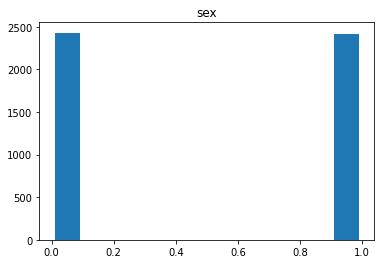

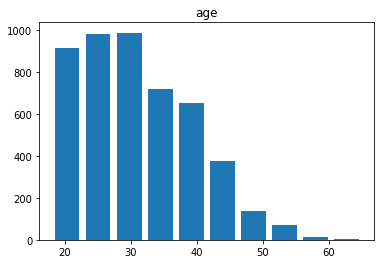

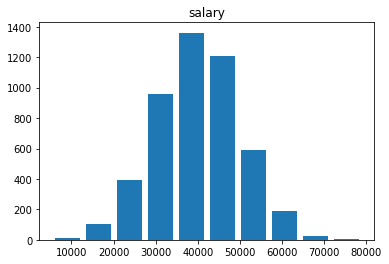

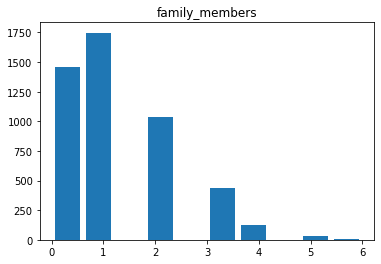

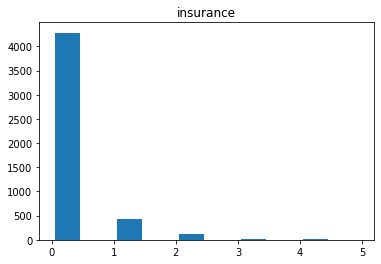

In [7]:
for col in data.columns:
    data[col].hist(grid=False, rwidth=.8)
    plt.title(col)
    plt.show()

### Вывод: данные изучени и подготовлены к обучению. 

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

\cdot\cdotОтвет:\cdot\cdot Если умножить признаки на ОБРАТИМУЮ матрицу, то качество предсказаний не изменится.

\cdot\cdotОбоснование:\cdot\cdot 
1. Умножив матрицу принаков на обратимую матрицу (P), мы получим новую матрицу (Z): 

    $$ Z = X \cdot P $$ <p>
    
2. В таком случае вектор весов будет выражаться следующей формулой: 
<p>
    $$ w' = (Z^T \cdot Z)^{-1} \cdot Z^T \cdot y $$
<p>
    
3. Предсказания: 
<p>
    $$ a' = Z \cdot w' = Z \cdot (Z^T \cdot Z)^{-1} \cdot Z^T \cdot y $$
<p>

4. Свойство матриц: $ (A \cdot B)^{-1} = B^{-1} \cdot A^{-1}$ и $ (A \cdot B)^T = B^T \cdot A^T $ :
<p> 
    $$ a' = Z \cdot Z^{-1} \cdot  (Z^T)^{-1} \cdot Z^T \cdot y $$
<p>
    
5. Если матрица $A$ умножается на обратную $A^{-1}$, то это приводит к единичной матрице $ E $. Мы не знаем обратима ли матрица $ Z $, но мы знаем что матрица $ P $ обратима исходя из условия задания. Подставим вместо $ Z = X \cdot P $:
<p>
    $$ a' = (X \cdot P) \cdot (X \cdot P)^{-1} \cdot ((X \cdot P)^T)^{-1} \cdot (X \cdot P)^T \cdot y $$
<p>

6. Раскроем скобки учитывая свойство матриц (см. выше):
<p>
    $$ a' = X \cdot P \cdot P^{-1} \cdot X^{-1} \cdot (P^T \cdot X^T)^{-1} \cdot  P^T \cdot X^T \cdot y =
      X \cdot \textbf P \cdot \textbf  P^{-1} \cdot X^{-1} \cdot (X^T)^{-1} \cdot (\textbf P^T)^{-1} \cdot \textbf P^T \cdot X^T \cdot y 
    $$
<p>
7. Если матрица $P$ умножается на обратную $P^{-1}$, то это приводит к единичной матрице $ E $ (то же верно и при умножении транспонированных матриц прямую на обратную). Таким образом, все наши матрицы Р (прямая, обратная, транспонированная Р прямая, и транспонированная Р обратная) образуют 2 единичные матрицы:
<p>
    $$ 
    a' = X \cdot \textbf E \cdot (X^T)^{-1} \cdot X^{-1} \cdot \textbf E \cdot X^T \cdot y
    $$
<p>
    
8. Сократим единичные матрицы:
<p>
    $$ 
    a' = X \cdot (X^T)^{-1} \cdot X^{-1} \cdot X^T \cdot y
    $$
<p>
9. Вынесем обратимость матрицы за скобки:
<p>
    $$ 
    a' = X \cdot (X^T \cdot X)^{-1} \cdot X^T \cdot y
    $$
<p>
10. Итак, мы пришли к тому с чего начинали:
<p>
$$
w = (X^T X)^{-1} X^T y
$$
<p>
11. При умножении матрицы признаков на транспонированную, наши предскзания не изменятся
<p>
    $$ 
    a' = X \cdot w = a
    $$
<p>
12. $\textbf Ч.\textbf Т.\textbf Д.$

Используемые свойства:
$$
(AB)^T=B^T A^T
$$
$$
(AB)^{-1} = B^{-1} A^{-1}
$$
$$
A A^{-1} = A^{-1} A = E
$$
$$
AE = EA = A
$$

## Алгоритм преобразования

**Алгоритм**

1. Возьмём признаки (они должны быть числовыми) в виде матрицы (np.array).
2. Извлечем размерность матрицы - shape. В размерности нас интересует её ширина (количество признаков без целевого).
3. Создадим произвольную обратимую матрицу, размерностью равной количеству признаков. Проверим матрицу на обратимость (определитель матрицы не равен нулю)
4. Умножим матрицу признаков на нашу обратимую матрицу.
5. Проверим как выглядят наши данные
6. Обучим модель линейной регрессии. 
7. Оценим качество модели метрикой r2_score
8. Извлечем из модели вектор весов, запомним его.
9. Умножим признаки на найденную обратимую матрицу
10. Обучим новую модель линейно регрессии, оценим качество модели, сравним ее с качеством предыдущей модели.

**Обоснование**

Учитывая математическое доказательство (см. выше) умножение признаков на обратимую матрицу не должно привести к снижению качества модели.

## Проверка алгоритма

In [8]:
# извлечем данные из датафрейма
features = data.loc[:,['sex', 'age', 'salary', 'family_members']].values
target = data['insurance'].values

n = features.shape[1]
det = 0

# создадим матрицу n x n, проверим её в цикле чтобы определитель не был равен 0, если равен, то создадим новую
while det == 0:
    m = np.random.randint(0,10,(n,n))
    det = np.linalg.det(m)
    
# разделим данные на обучающую и тестовую выборки
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=.25, 
                                                                            random_state=12345)
# проверим качество разметки
print('Размер признаков обучающей выборки'.ljust(45), len(features_train))
print('Размер целевого признака обучающей выборки'.ljust(45), len(target_train))
print('Размер признаков тестовой выборки'.ljust(45), len(features_test))
print('Размер целевого признака тестовой выборки'.ljust(45), len(target_test))

# обучим модель линейной регрессии
model = LinearRegression()
model.fit(features_train, target_train)

# получим предсказания и выведем на экран качество модели
predictions = model.predict(features_test)
print('Качество модели до кодирования: {:.04f}'.format(r2_score(target_test, predictions)))

Размер признаков обучающей выборки            3635
Размер целевого признака обучающей выборки    3635
Размер признаков тестовой выборки             1212
Размер целевого признака тестовой выборки     1212
Качество модели до кодирования: 0.4231


### Кодируем признаки и обучим модель заново:

In [9]:
# умножим нашу найденную матрицу на признаки
features_code = features @ m

code_df = pd.DataFrame(data=features_code, index=data.index, columns=data.columns[:-1])
code_df

,sex,age,salary,family_members
0,198732,149139,297889,248338
1,152371,114371,228323,190372
2,84232,63232,126203,105232
3,166974,125274,250349,208676
4,104625,78532,156797,130730
...,...,...,...,...
4995,143030,107330,214398,178732
4996,209875,157475,314639,262276
4997,135766,101866,203542,169668
4998,130986,98293,196358,163694


In [10]:
# разделим данные на обучающую и тестовую выборки
features_train_сode, features_test_code, target_train, target_test = train_test_split(features_code, 
                                                                            target, 
                                                                            test_size=.25, 
                                                                            random_state=12345)
# проверим качество разметки
print('Размер признаков обучающей выборки'.ljust(45), len(features_train_сode))
print('Размер целевого признака обучающей выборки'.ljust(45), len(target_train))
print('Размер признаков тестовой выборки'.ljust(45), len(features_test_code))
print('Размер целевого признака тестовой выборки'.ljust(45), len(target_test))

# обучим модель линейной регрессии
model_code = LinearRegression()
model_code.fit(features_train_сode, target_train)

# получим предсказания и выведем на экран качество модели
predictions_code = model_code.predict(features_test_code)
print('Качество модели после кодирования: {:.08f}'.format(r2_score(target_test, predictions_code)))
print('Качество модели до кодирования:    {:.08f}'.format(r2_score(target_test, predictions)))

Размер признаков обучающей выборки            3635
Размер целевого признака обучающей выборки    3635
Размер признаков тестовой выборки             1212
Размер целевого признака тестовой выборки     1212
Качество модели после кодирования: 0.42307728
Качество модели до кодирования:    0.42307728


# Вывод: кодирование данных посредством матричного умножения на обратимую матрицу не приводит к искажению качества модели линейной регрессии.